<a href="https://colab.research.google.com/github/seungyihong/AI_ml/blob/master/keras_CNN_implementataion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import cifar10
from tensorflow.python.keras.utils import np_utils
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()
X_train0, X_val0 , y_train0, y_val0 = train_test_split(X_train0, y_train0,
                                                       test_size = 0.3)

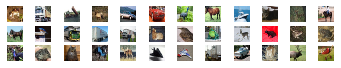

In [33]:
plt.figure(figsize=(6, 1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i], cmap="gray")
    plt.axis("off")
plt.show()

In [47]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_val0.shape, X_val0.dtype)
print(y_val0.shape, y_val0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(35000, 32, 32, 3) uint8
(35000, 1) uint8
(15000, 32, 32, 3) uint8
(15000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) uint8


In [0]:
X_train = X_train0.astype('float32') / 255.0
X_val = X_val0.astype('float32') / 255.0
X_test = X_test0.astype('float32') / 255.0

In [49]:
print(X_train.shape,X_train.dtype)
print(X_val.shape,X_val.dtype)
print(X_test.shape,X_test.dtype)

(35000, 32, 32, 3) float32
(15000, 32, 32, 3) float32
(10000, 32, 32, 3) float32


In [37]:
y_train0[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(y_train0,10)
Y_val = np_utils.to_categorical(y_val0,10)
Y_test = np_utils.to_categorical(y_test0,10)

In [51]:
print(Y_train.shape,Y_train.dtype)
print(Y_val.shape,Y_val.dtype)
print(Y_test.shape,Y_test.dtype)

(35000, 10) float32
(15000, 10) float32
(10000, 10) float32


In [40]:
Y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Con2D - BatchNormalization () batch를 잘라서 batch 마다 mean, std로 표준화 
# (데이터를 계속 다듬어 줌 ) -
# Activation - Dropout(0.2)- maxpooling(max pooling은 세트로 쓰는 것은 아니다
# 않좋은 결과를 얻을 수도 있기 때문에 그때마다 다르다)
# Dropout : overfitting 방지 
# random 적으로 weight를 주는 과정을 없앰 
# Dropout(0.2) 20%의 node를 꺼놓고 학습시킨다
# BatchNormalization 

# Trainable = True/False
# con2D/Feature :False , Dense :True 

model1 = Sequential()
model1.add(Conv2D(4,(3,3), input_shape=(32,32,3),padding='same', 
                  kernel_initializer="glorot_uniform"))
model1.add(Conv2D(8,(3,3),padding='same', 
                  kernel_initializer="glorot_uniform"))
model1.add(BatchNormalization())

model1.add(Conv2D(16,(3,3),padding='same', 
                  kernel_initializer="glorot_uniform"))

model1.add(BatchNormalization())

model1.add(Conv2D(32,(3,3),padding='same', 
                  kernel_initializer="glorot_uniform"))

model1.add(BatchNormalization())
model1.add(MaxPooling2D())

model1.add(Conv2D(64,(3,3),padding='same', 
                  kernel_initializer="glorot_uniform"))

model1.add(BatchNormalization())
model1.add(MaxPooling2D())


model1.add(Flatten())


model1.add(Dense(300,activation='relu',kernel_initializer="glorot_uniform"))
model1.add(BatchNormalization())

# kernel_init : weight 초기화 


model1.add(Dense(10,activation='softmax',kernel_initializer="glorot_uniform"))

np.random.seed(0)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], 
               optimizer=Adam(lr=0.001))


In [287]:
model1.summary()

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_166 (Conv2D)          (None, 32, 32, 4)         112       
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 32, 32, 8)         296       
_________________________________________________________________
batch_normalization_168 (Bat (None, 32, 32, 8)         32        
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 32, 32, 16)        1168      
_________________________________________________________________
batch_normalization_169 (Bat (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_121 (MaxPoolin (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 16, 16, 32)      

In [289]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=10, batch_size=300,
                   validation_data=(X_val, Y_val), verbose=2)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 - 7s - loss: 1.4209 - acc: 0.5090 - val_loss: 2.4217 - val_acc: 0.2581
Epoch 2/10
35000/35000 - 3s - loss: 1.0010 - acc: 0.6534 - val_loss: 1.7820 - val_acc: 0.4055
Epoch 3/10
35000/35000 - 3s - loss: 0.8297 - acc: 0.7147 - val_loss: 1.2992 - val_acc: 0.5368
Epoch 4/10
35000/35000 - 3s - loss: 0.6899 - acc: 0.7628 - val_loss: 1.1472 - val_acc: 0.6059
Epoch 5/10
35000/35000 - 3s - loss: 0.5816 - acc: 0.8003 - val_loss: 1.1156 - val_acc: 0.6365
Epoch 6/10
35000/35000 - 3s - loss: 0.4732 - acc: 0.8403 - val_loss: 1.1380 - val_acc: 0.6540
Epoch 7/10
35000/35000 - 3s - loss: 0.3701 - acc: 0.8798 - val_loss: 1.2486 - val_acc: 0.6457
Epoch 8/10
35000/35000 - 3s - loss: 0.2883 - acc: 0.9087 - val_loss: 1.1397 - val_acc: 0.6732
Epoch 9/10
35000/35000 - 3s - loss: 0.2042 - acc: 0.9397 - val_loss: 1.1221 - val_acc: 0.6955
Epoch 10/10
35000/35000 - 3s - loss: 0.1465 - acc: 0.9586 - val_loss: 1.2966 - val_acc: 0.6779
CPU times

In [281]:
model1.evaluate(X_test,Y_test)

10000/10000 [==============================] - 1s 146us/sample - loss: 1.3696 - acc: 0.7100


[1.369591330909729, 0.71]

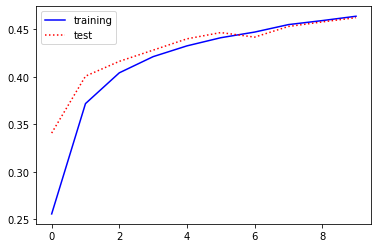

In [45]:
plt.plot(hist1.history['acc'], 'b-', label='training')
plt.plot(hist1.history['val_acc'], 'r:', label='test')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54596 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54596 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0, flags=flags)


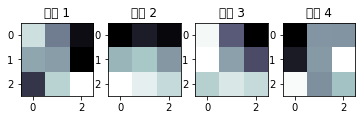

In [19]:
l1 = model1.layers[0]
w1, b1 = l1.get_weights()

M=4
for i in range(M):
  plt.subplot(1,M,i+1)
  plt.imshow(w1[:,:,0,i], cmap=mpl.cm.bone)
  plt.title("필터 {}". format(i+1))
  plt.grid(False)

In [28]:
print(w1[:, :, 0, i])

[[[[ 0.50412697 -1.4076698   0.6613508  -0.23521215]]

  [[ 0.28208238 -1.1059543  -0.456737    0.21270792]]

  [[ 0.00181136 -1.313464   -1.235771    0.2110026 ]]]


 [[[ 0.36717388  0.1650932   0.72499716 -0.14271542]]

  [[ 0.34776467  0.30706853 -0.01149743  0.22393565]]

  [[-0.03966236 -0.05599328 -0.56998557  0.5273155 ]]]


 [[[ 0.11284079  0.8744625   0.31451124  0.51472867]]

  [[ 0.46806896  0.70517987  0.5109224   0.19921236]]

  [[ 0.59503573  0.49714753  0.39866915  0.32375076]]]]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54596 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_

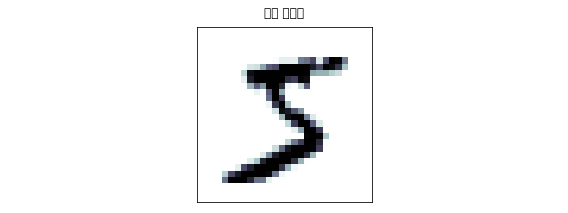

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54596 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0,

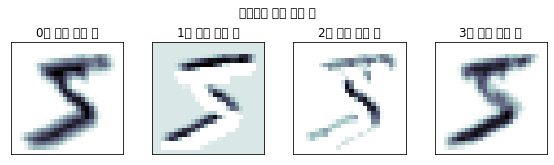

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47589 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54400 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47553 missing from current font.
  font.set_text(s, 0, flags=flags)


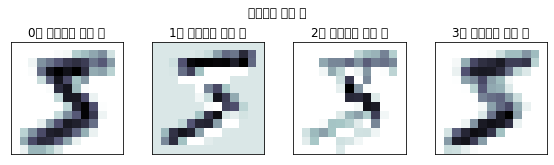

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48289 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)


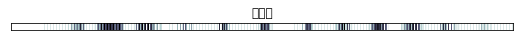

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_

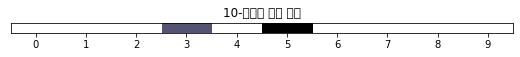

In [26]:
import tensorflow.keras.backend as K

f10 = K.function([model1.input], [model1.layers[0].output])
f11 = K.function([model1.input], [model1.layers[1].output])
f12 = K.function([model1.input], [model1.layers[2].output])
f13 = K.function([model1.input], [model1.layers[3].output])

def visualize1(n):
    x = X_train[n:n + 1]
    plt.figure(figsize=(8, 3))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        if i == 1:
            plt.imshow(x[0, :, :, 0], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
        else:
            plt.imshow(np.zeros_like(x[0, :, :, 0]), cmap=mpl.cm.bone_r)
            plt.axis("off")
    plt.tight_layout()
    plt.suptitle("입력 이미지", y=1)
    
    z0 = f10([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(z0[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("{}번 필터 통과 후".format(i))
    plt.tight_layout()
    plt.suptitle("컨벌루션 필터 통과 후", y=1.1)
    
    z1 = f11([x])[0]
    plt.figure(figsize=(8, 2))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(z1[0, :, :, i], cmap=mpl.cm.bone_r)
        plt.xticks([]); plt.yticks([]); plt.grid(False)
        plt.title("{}번 맥스풀링 통과 후".format(i))
    plt.tight_layout()
    plt.suptitle("맥스풀링 통과 후", y=1.1)
        
    z2 = f12([x])[0]
    plt.figure(figsize=(9, 1))
    plt.imshow(z2, aspect=10, cmap=mpl.cm.bone_r)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.title("벡터화")
    
    z3 = f13([x])[0]
    plt.figure(figsize=(9, 1))
    plt.imshow(z3, aspect=0.2, cmap=mpl.cm.bone_r)
    plt.xticks(range(10)); plt.yticks([]); plt.grid(False)
    plt.title("10-클래스 분류 결과")

visualize1(0)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54596 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_

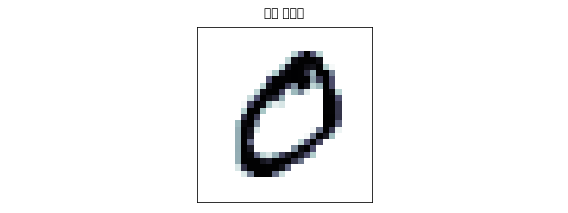

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54596 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0,

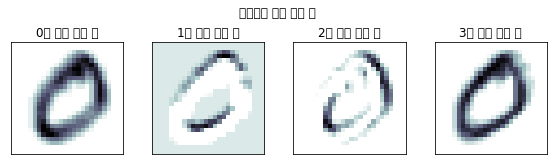

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47589 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54400 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47553 missing from current font.
  font.set_text(s, 0, flags=flags)


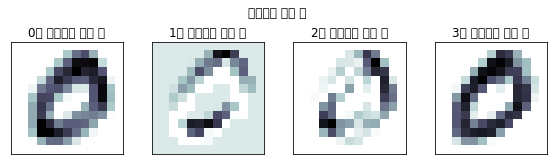

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48289 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)


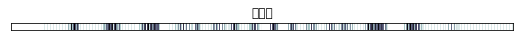

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_

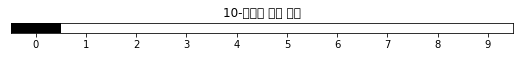

In [27]:
visualize1(1)